In [13]:
# effects of religion on judgment solution

# maybe there more antiwomen cases by religion of gudge

#  'HIGH COURT OF WEST PAKISTAN LAHORE' vs 'LAHORE HIGH COURT' --- a new country (FREEDOM of BANGLADESH), court system had been changed

# 1977 court takeover in pakistan

In [1]:
import sys
import pickle
import itertools
import pandas as pd
from tqdm import tqdm
from time import sleep
from pathlib import Path
from selenium import webdriver
from joblib import Parallel, delayed
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

from utils import chunks, read_or_new_pickle, pop_elements

In [2]:
path = Path('data')

cases = read_or_new_pickle(path / 'cases.pkl')

cases = pd.DataFrame(cases)

print(round(sys.getsizeof(cases) / (1024 ** 3), 3))

1.891


In [3]:
cases['easylaw Case No.'].nunique() == cases.drop_duplicates(set(cases.columns) - set(['search_term'])).shape[0]

# -> unique cases by 'easylaw Case No.' are equal to unique cases by all parameters except 'seatch_term'

True

In [5]:
cases = cases.drop_duplicates('easylaw Case No.').reset_index(drop=True)

cases['Date'] = pd.to_datetime(cases['Date'])

<Axes: xlabel='Date'>

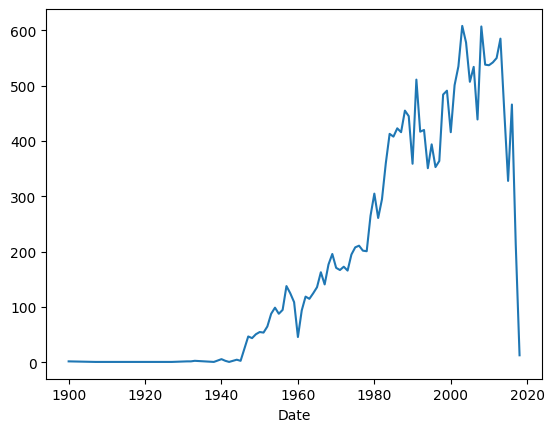

In [16]:
cases['Date'].dt.year.value_counts().sort_index().plot()

In [6]:
cases.to_csv(path / 'cases.csv', sep='\t', index=False, header=True, encoding='utf-8')